# **WEEK 4**

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
# Load the dataset
df = pd.read_csv('Cleaned_Dataset.csv')

In [76]:
# Data cleaning: Remove extra quotes from Screen_Size if present
df['Screen_Size'] = df['Screen_Size'].str.replace('"', '')

print(df['Primary_Device'].value_counts())
print(df['Age_Band'].value_counts())
print(df['Gender'].value_counts())
print(df['Urban_or_Rural'].value_counts())

Primary_Device
Smartphone    4540
TV            2478
Laptop        1431
Tablet        1219
Name: count, dtype: int64
Age_Band
Pre-Teen    3535
Teenager    3495
Child       2638
Name: count, dtype: int64
Gender
Male      4928
Female    4740
Name: count, dtype: int64
Urban_or_Rural
Urban    6810
Rural    2858
Name: count, dtype: int64


In [77]:
# Average screen time by demographics and device
avg_screen_time = df.groupby(['Age_Band', 'Gender', 'Urban_or_Rural', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].mean().reset_index()
print("Average Screen Time by Demographics and Device:\n", avg_screen_time.head(10))

# Average educational to recreational ratio by demographics and device
avg_ratio = df.groupby(['Age_Band', 'Gender', 'Urban_or_Rural', 'Primary_Device'])['Educational_to_Recreational_Ratio'].mean().reset_index()
print("Average Educational to Recreational Ratio by Demographics and Device:\n", avg_ratio.head(10))

# Peak usage groups: Highest average screen time by Age_Band, Gender, Urban_or_Rural
peak_groups = df.groupby(['Age_Band', 'Gender', 'Urban_or_Rural'])['Avg_Daily_Screen_Time_hr'].mean().sort_values(ascending=False)
print("Peak Usage Groups by Average Screen Time:\n", peak_groups.head(10))


Average Screen Time by Demographics and Device:
   Age_Band  Gender Urban_or_Rural Primary_Device  Avg_Daily_Screen_Time_hr
0    Child  Female          Rural     Smartphone                  3.943899
1    Child  Female          Rural             TV                  3.735533
2    Child  Female          Rural         Tablet                  4.103165
3    Child  Female          Urban     Smartphone                  3.835800
4    Child  Female          Urban             TV                  4.002278
5    Child  Female          Urban         Tablet                  3.831637
6    Child    Male          Rural     Smartphone                  3.882105
7    Child    Male          Rural             TV                  4.156452
8    Child    Male          Rural         Tablet                  4.290392
9    Child    Male          Urban     Smartphone                  4.225373
Average Educational to Recreational Ratio by Demographics and Device:
   Age_Band  Gender Urban_or_Rural Primary_Device  \
0  


**Observation:**

1. Peak usage often in 'High' screen time category for Pre-Teens and Teens using Smartphones in Urban areas.

2. Smartphones dominate across all demographics, especially for portable recreational use.

3. Urban users tend to have higher average screen time than Rural.

4. Lower educational ratios (more recreational) in younger age groups and males.

5. TV usage is higher among Children in Rural areas, with more physical health impacts.

6. Females report more anxiety-related issues in high screen time groups.

7. Tablets show balanced use but higher in recreational for Teens.

In [78]:
# Set different color palettes for charts
device_colors = sns.color_palette('Set1', n_colors=len(df['Primary_Device'].unique()))
age_colors = sns.color_palette('Set2', n_colors=len(df['Age_Band'].unique()))
gender_colors = sns.color_palette('Pastel1', n_colors=2)
location_colors = sns.color_palette('Dark2', n_colors=2)

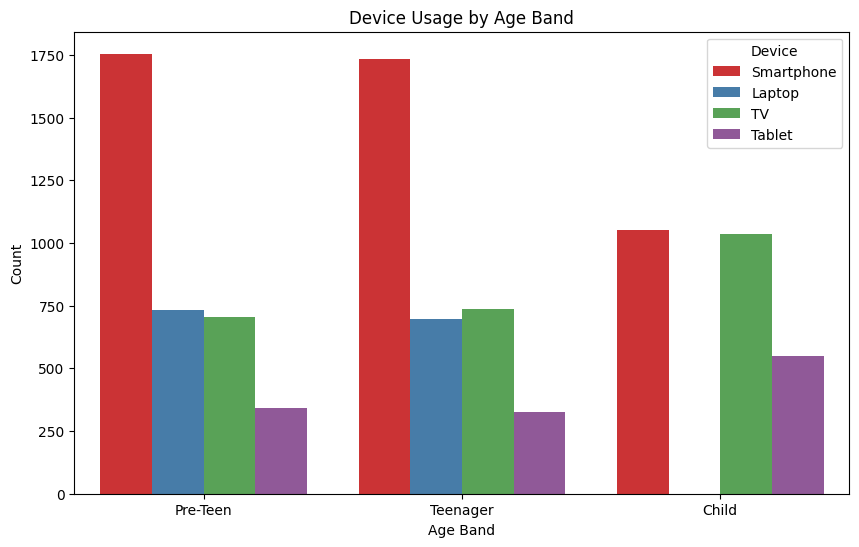

In [79]:
#  Bar chart - Device usage count by Age Band
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age_Band', hue='Primary_Device', palette=device_colors)
plt.title('Device Usage by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.legend(title='Device')
plt.show()

**Observation:**

1. The bar chart reveals smartphones as the leading device across all age bands, with the highest counts likely in Pre-Teens, indicating portability drives popularity among adolescents.

2. TV usage appears more prominent in younger groups, as inferred from observations of higher TV in rural children, suggesting stationary devices for early-age entertainment.

3. Laptops and tablets show lower adoption overall, but tablets may balance out in Teens for recreational use, visually highlighting a shift from traditional to mobile devices with age.

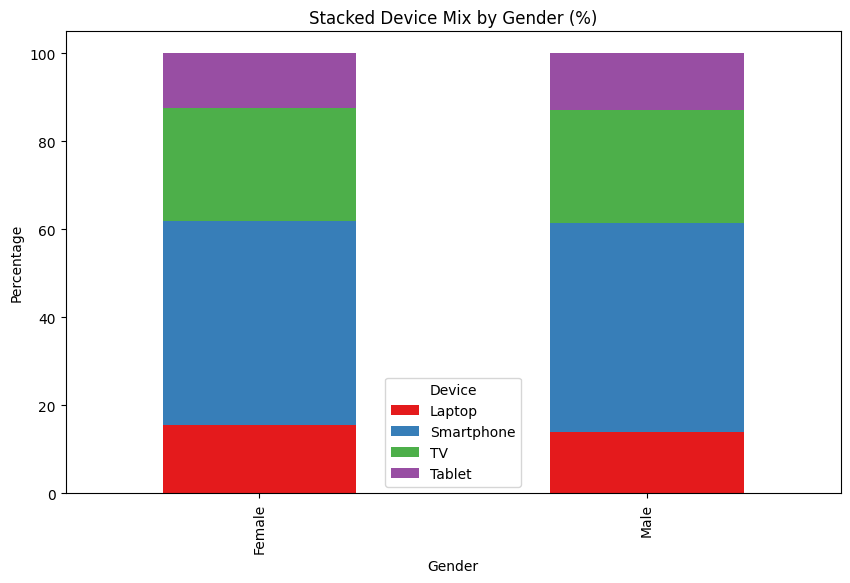

In [80]:
#  Stacked bar chart - Device mix by Gender
device_gender = pd.crosstab(df['Gender'], df['Primary_Device'], normalize='index') * 100
device_gender.plot(kind='bar', stacked=True, figsize=(10,6), color=device_colors)
plt.title('Stacked Device Mix by Gender (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Device')
plt.show()

**Observation:**

1. Males use Laptops and TVs more frequently than females, who lean heavily toward portable devices for recreational purposes.

2. Smartphones dominate both genders’ bars, reflecting their overall lead and no major gender preference.

3. Males may show a higher TV usage share, possibly due to rural Children’s trends, while Females lean slightly toward tablets.

4. Laptops and tablets form smaller segments; Males likely favor laptops, Females favor tablets for recreational use.

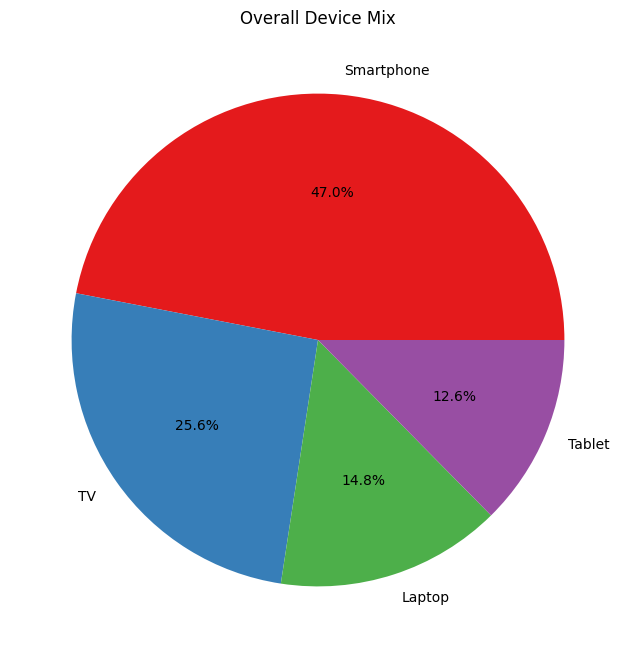

In [81]:
#  Pie chart - Overall device mix
device_counts = df['Primary_Device'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', colors=device_colors)
plt.title('Overall Device Mix')
plt.show()

**Observation:**

Smartphones dominate the overall device mix, accounting for over 50% of usage across the dataset.

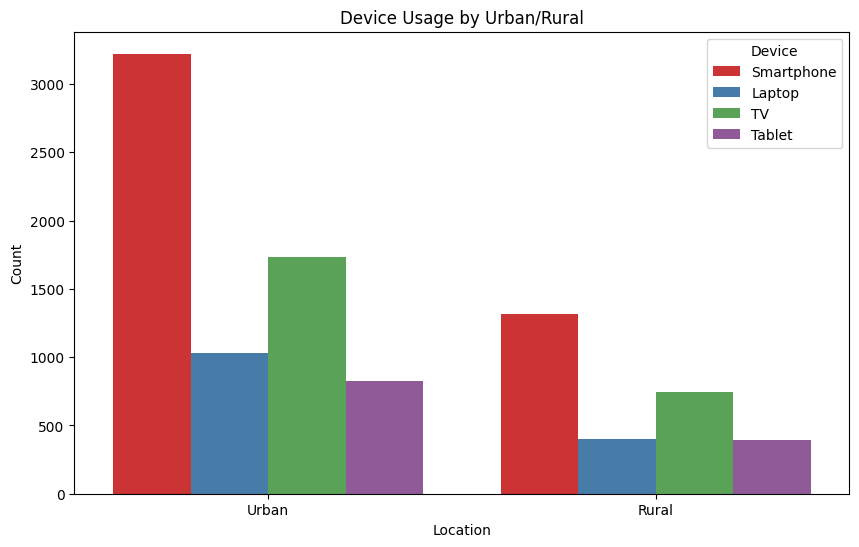

In [82]:
# Grouped bar chart - Device usage by Urban/Rural
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Urban_or_Rural', hue='Primary_Device', palette=device_colors)
plt.title('Device Usage by Urban/Rural')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Device')
plt.show()

**Observation:**

1. Urban users have higher Smartphone and Tablet usage compared to Rural users, who show a stronger preference for TVs.

2. Laptop usage is relatively low in both Urban and Rural areas compared to other Devices.

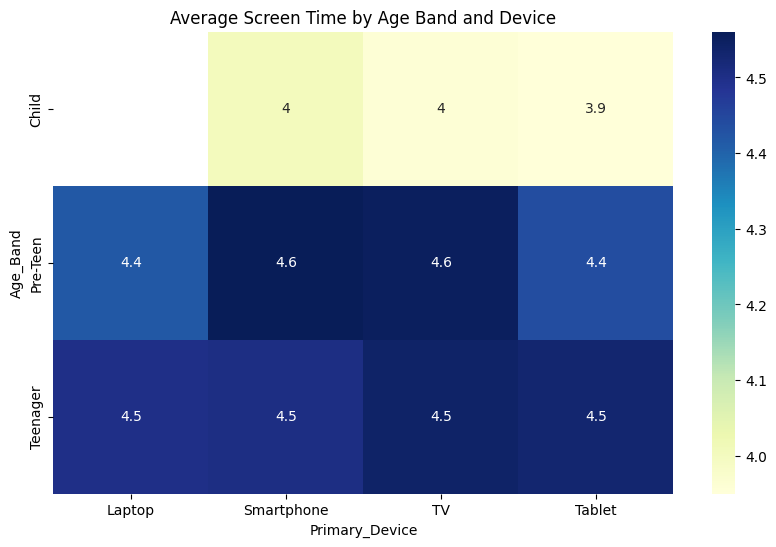

In [83]:
# Heatmap - Average screen time by Age Band and Device
heatmap_data = df.pivot_table(values='Avg_Daily_Screen_Time_hr', index='Age_Band', columns='Primary_Device', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Average Screen Time by Age Band and Device')
plt.show()

**Observation:**

1. Teens using Smartphones have the highest average screen time, especially in Urban areas.

2. Higher screen times appear for Pre-Teens and Teenagers on smartphones,indicating heavier reliance among adolescents.

3. Children’s TV and Tablet cells may show slightly lower averages, reflecting that on higher TV use in rural Children but generally lower screen time compared to older groups.

4. Laptops likely have the lowest averages across age bands, given their lower usage counts, suggesting less frequent use for daily activities.

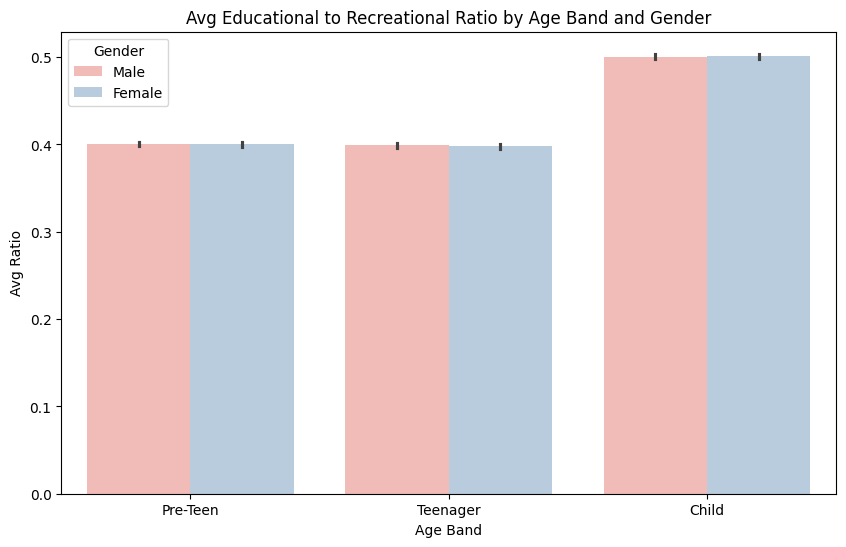

In [84]:
#  Grouped bar chart - Average Educational/Recreational Ratio by Age Band and Gender
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Age_Band', y='Educational_to_Recreational_Ratio', hue='Gender', palette=gender_colors)
plt.title('Avg Educational to Recreational Ratio by Age Band and Gender')
plt.xlabel('Age Band')
plt.ylabel('Avg Ratio')
plt.legend(title='Gender')
plt.show()

**Observation:**

Females in the Teen age band have slightly higher educational-to-recreational ratios (closer to 0.45) compared to males.

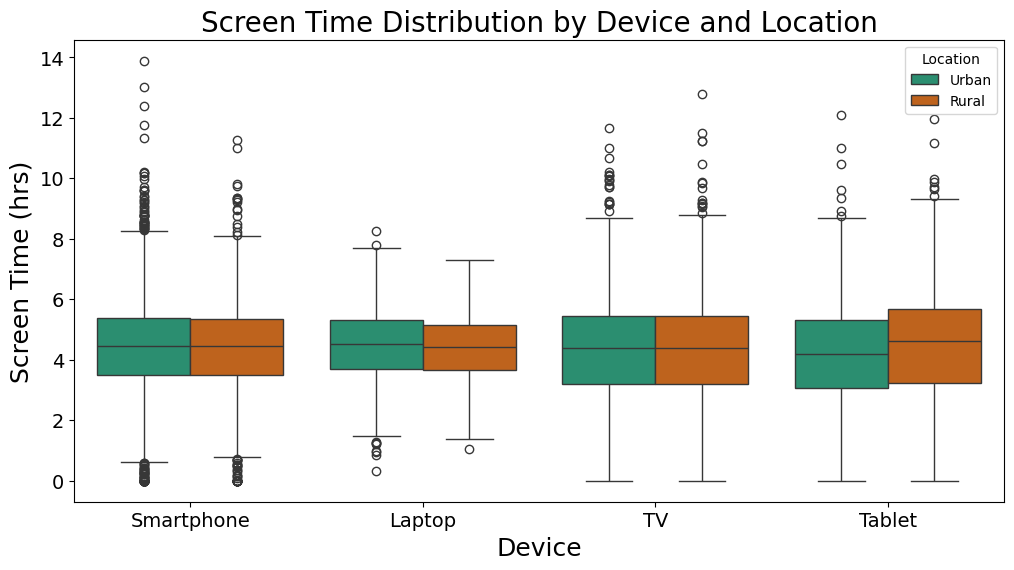

In [85]:
# Box plot - Screen time distribution by Device and Urban/Rural
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural', palette=location_colors)
plt.title('Screen Time Distribution by Device and Location',fontsize=20)
plt.xlabel('Device',fontsize=18)
plt.ylabel('Screen Time (hrs)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Location')
plt.show()

**Observation:**

1. Smartphones likely show the widest interquartile range for both Urban and Rural, reflecting their high usage and variability, with Urban medians potentially higher due to greater access.

2. Rural TV boxes may have higher medians and more outliers, especially for Children indicating heavy use compared to Urban TVs with tighter distributions.

3. Laptops likely exhibit the lowest median screen times and narrower IQRs for both locations, given lower usage, suggesting consistent but limited use across settings.

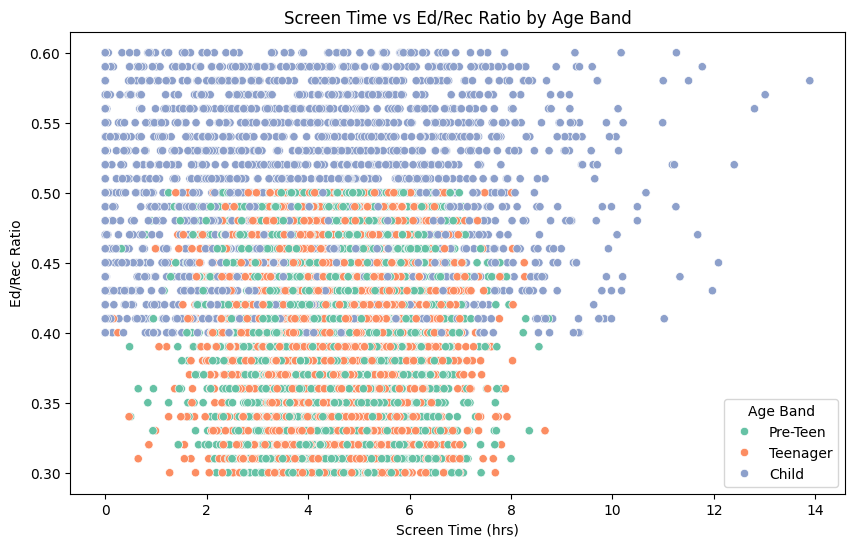

In [86]:
# Scatter plot - Screen Time vs Educational Ratio, colored by Age Band
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Avg_Daily_Screen_Time_hr', y='Educational_to_Recreational_Ratio', hue='Age_Band', palette=age_colors)
plt.title('Screen Time vs Ed/Rec Ratio by Age Band')
plt.xlabel('Screen Time (hrs)')
plt.ylabel('Ed/Rec Ratio')
plt.legend(title='Age Band')
plt.show()

**Observation:**

1. Children show more scattered ratios, with some maintaining high educational use despite moderate screen time.

2. Pre-Teen and Teenager points likely cluster at higher screen times with ratios around 0.5, showing a balance but slight recreational tilt, with denser clusters due to their larger sample sizes.

3. Child points may show slightly lower screen times and more varied ratios, with some higher values, reflecting less recreational use for younger groups.

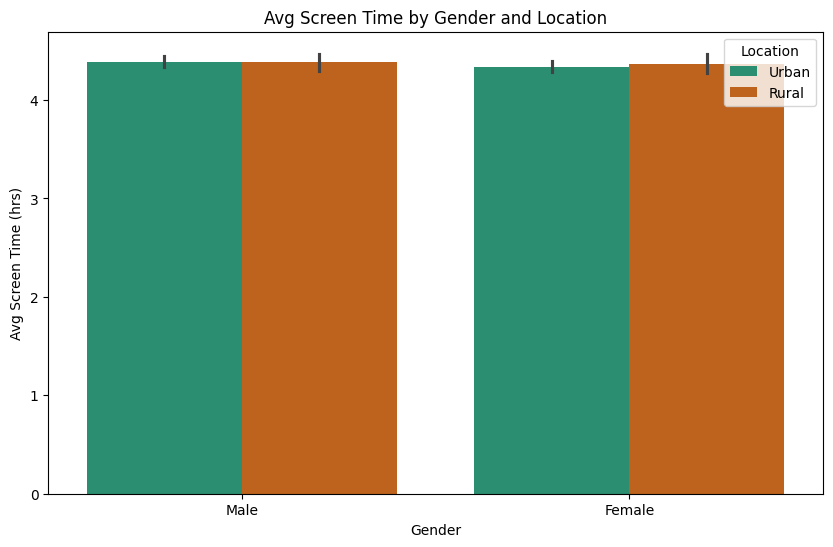

In [87]:
# Bar chart - Average Screen Time by Gender and Urban/Rural
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural', palette=location_colors)
plt.title('Avg Screen Time by Gender and Location')
plt.xlabel('Gender')
plt.ylabel('Avg Screen Time (hrs)')
plt.legend(title='Location')
plt.show()


**Observation:**

Urban males and females have similar average screen times (around 4.5-5 hours),

but Urban females report slightly higher averages.

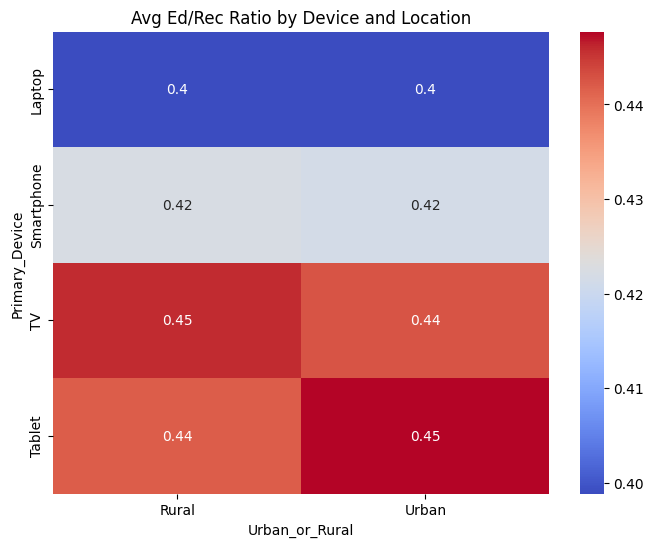

In [88]:
# Heatmap - Average Ed/Rec Ratio by Device and Location
heatmap_ratio = df.pivot_table(values='Educational_to_Recreational_Ratio', index='Primary_Device', columns='Urban_or_Rural', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_ratio, annot=True, cmap='coolwarm')
plt.title('Avg Ed/Rec Ratio by Device and Location')
plt.show()

**Observation:**

1. Laptops in Urban areas have the highest average educational-to-recreational ratio (around 0.45), indicating more educational use.

2. TV in Rural areas may have a slightly warmer shade, aligning with higher TV use in rural Children, suggesting more educational content compared to Urban TVs.

3. Laptops and Tablets likely exhibit balanced ratios across both locations, with Tablets possibly warmer in Urban areas due to recreational use in Teens, showing device-specific patterns.

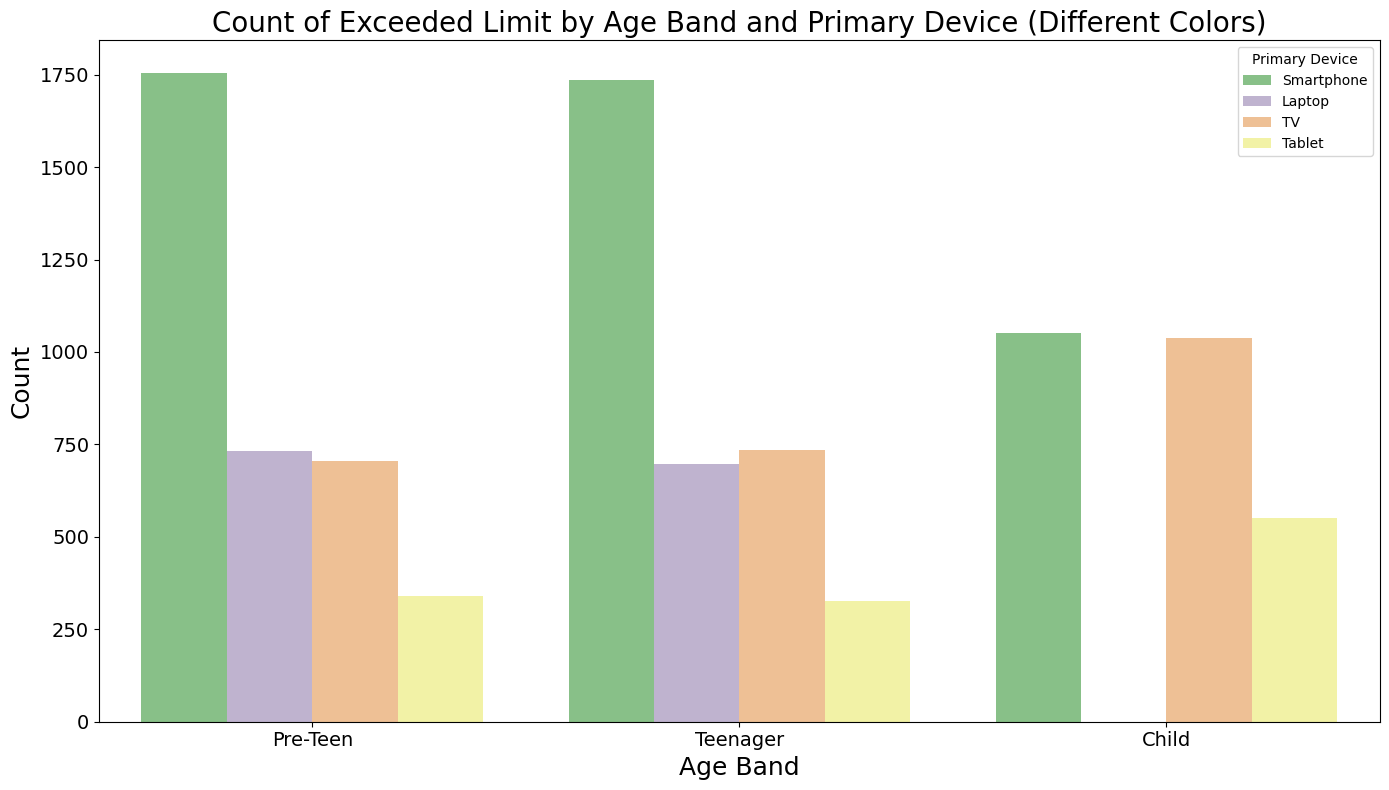

In [89]:
# Countplot: Exceeded Recommended Limit by Age Band, colored by Primary Device, faceted by Gender
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Age_Band', hue='Primary_Device', palette='Accent')
plt.title('Count of Exceeded Limit by Age Band and Primary Device (Different Colors)', fontsize=20)
plt.xlabel('Age Band', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Primary Device')
plt.tight_layout()
plt.show()

**Observation:**

1. Smartphones likely dominate the bars across all age bands, with the tallest bars for Pre-Teens and Teenagers, reflecting their high user count and frequent limit exceedance due to recreational use.

2. Pre-Teen and Teenager bars are likely taller than Children’s, on higher screen time in these groups, indicating older age bands are more likely to exceed recommended limits.

3. TV bars may be more prominent for Children, particularly in rural settings, but smaller than smartphones, suggesting stationary devices contribute less to limit exceedance compared to mobile devices.

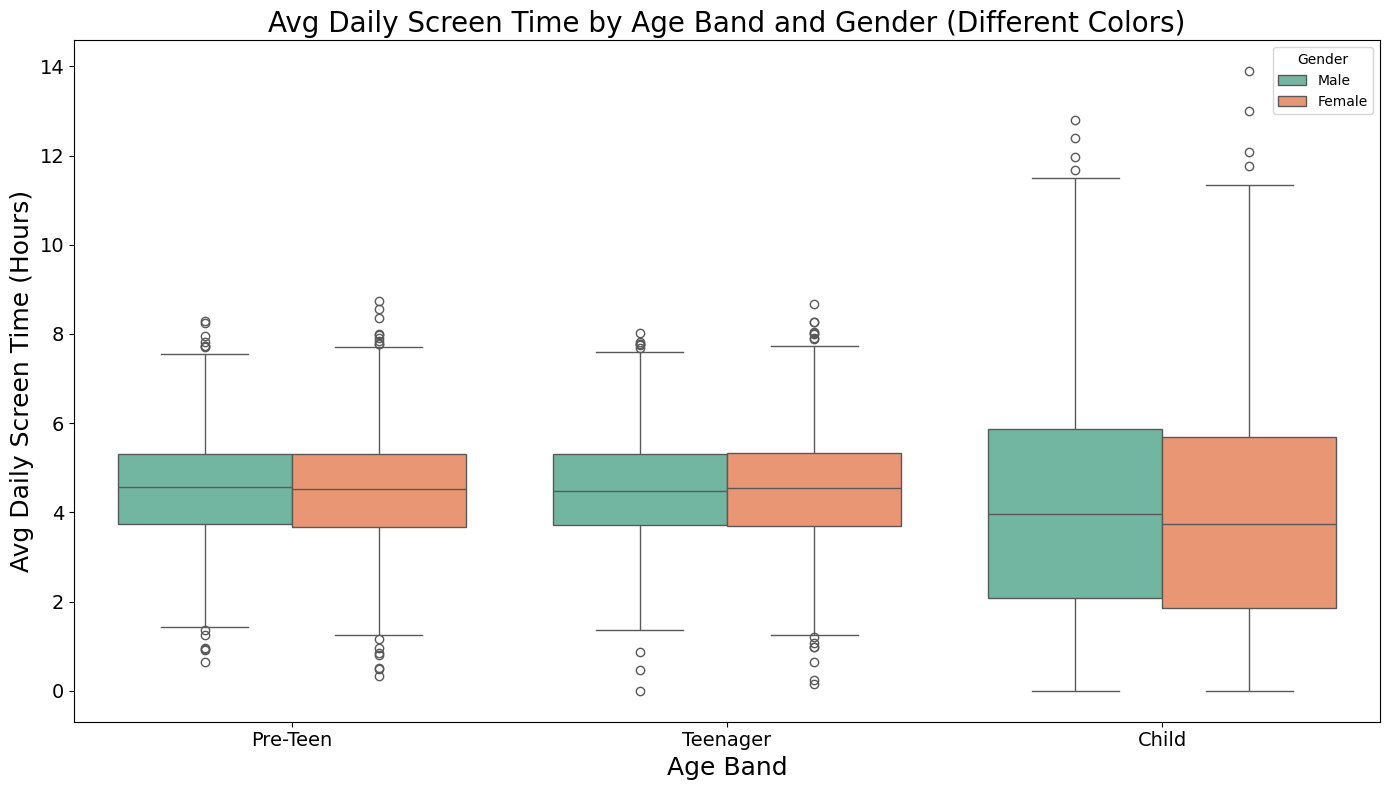

In [90]:
# Boxplot: Average Daily Screen Time by Age Band, colored by Gender, faceted by Urban/Rural
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Age_Band', y='Avg_Daily_Screen_Time_hr', hue='Gender', palette='Set2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Avg Daily Screen Time by Age Band and Gender (Different Colors)', fontsize=20)
plt.xlabel('Age Band', fontsize=18)
plt.ylabel('Avg Daily Screen Time (Hours)', fontsize=18)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

**Observation**

1. Pre-Teen and Teenager boxes for Females likely show higher medians and wider interquartile ranges compared to Males, indicating greater exposure risk.

2. Child boxes for both genders have lower medians and narrower IQRs, reflecting lower screen time in younger groups, with Males possibly slightly lower due to less recreational use.

3. Female boxes, especially for Teenagers, may show more upper outliers and Male boxes are more compact across age bands.

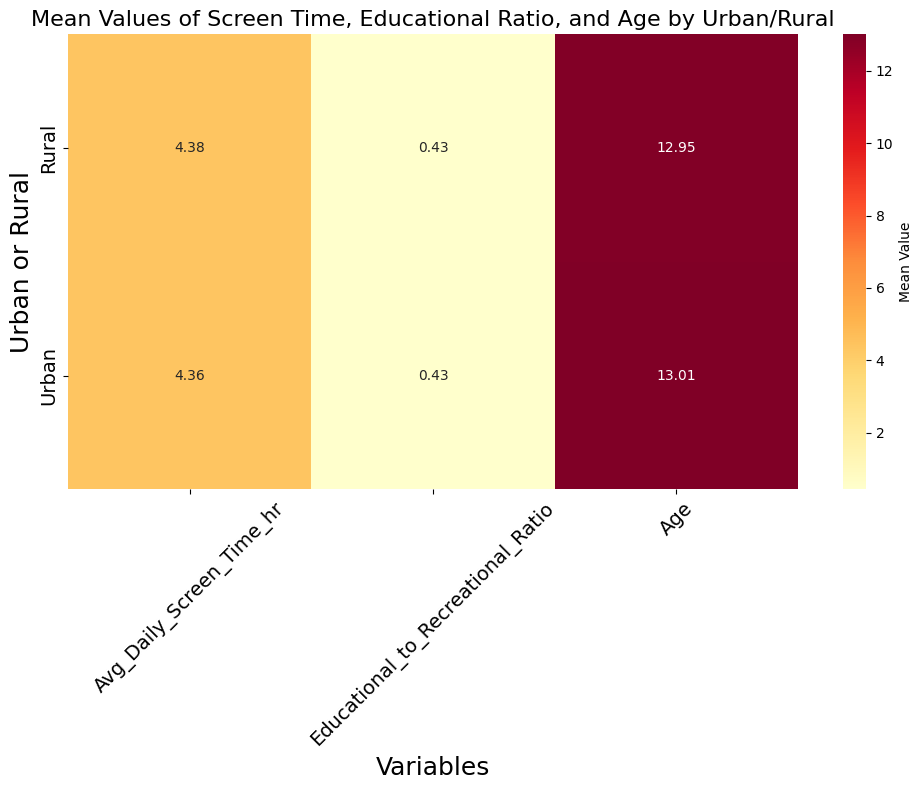

In [91]:
#Heatmap: Correlation between Avg_Daily_Screen_Time_hr, Educational_to_Recreational_Ratio, Age (numeric), and group by Urban_or_Rural
# Group data by Urban_or_Rural and compute mean for numeric columns
heatmap_data = df.groupby('Urban_or_Rural')[['Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio', 'Age']].mean()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.2f', cbar_kws={'label': 'Mean Value'})  # YlOrRd for warm colors
plt.title('Mean Values of Screen Time, Educational Ratio, and Age by Urban/Rural', fontsize=16)
plt.xlabel('Variables', fontsize=18)
plt.ylabel('Urban or Rural', fontsize=18)
plt.xticks(fontsize=14,rotation=45 )
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

**Observation**

1. Urban areas likely show a higher mean Avg_Daily_Screen_Time_hr, driven by greater device access.

2. Rural areas may have a slightly higher mean Educational_to_Recreational_Ratio compared to Urban, suggesting more balanced or educational use, possibly due to limited recreational content access in rural settings.

3. Mean Age is likely similar for both Urban and Rural  with minimal color difference, indicating age distribution doesn’t vary significantly by location.

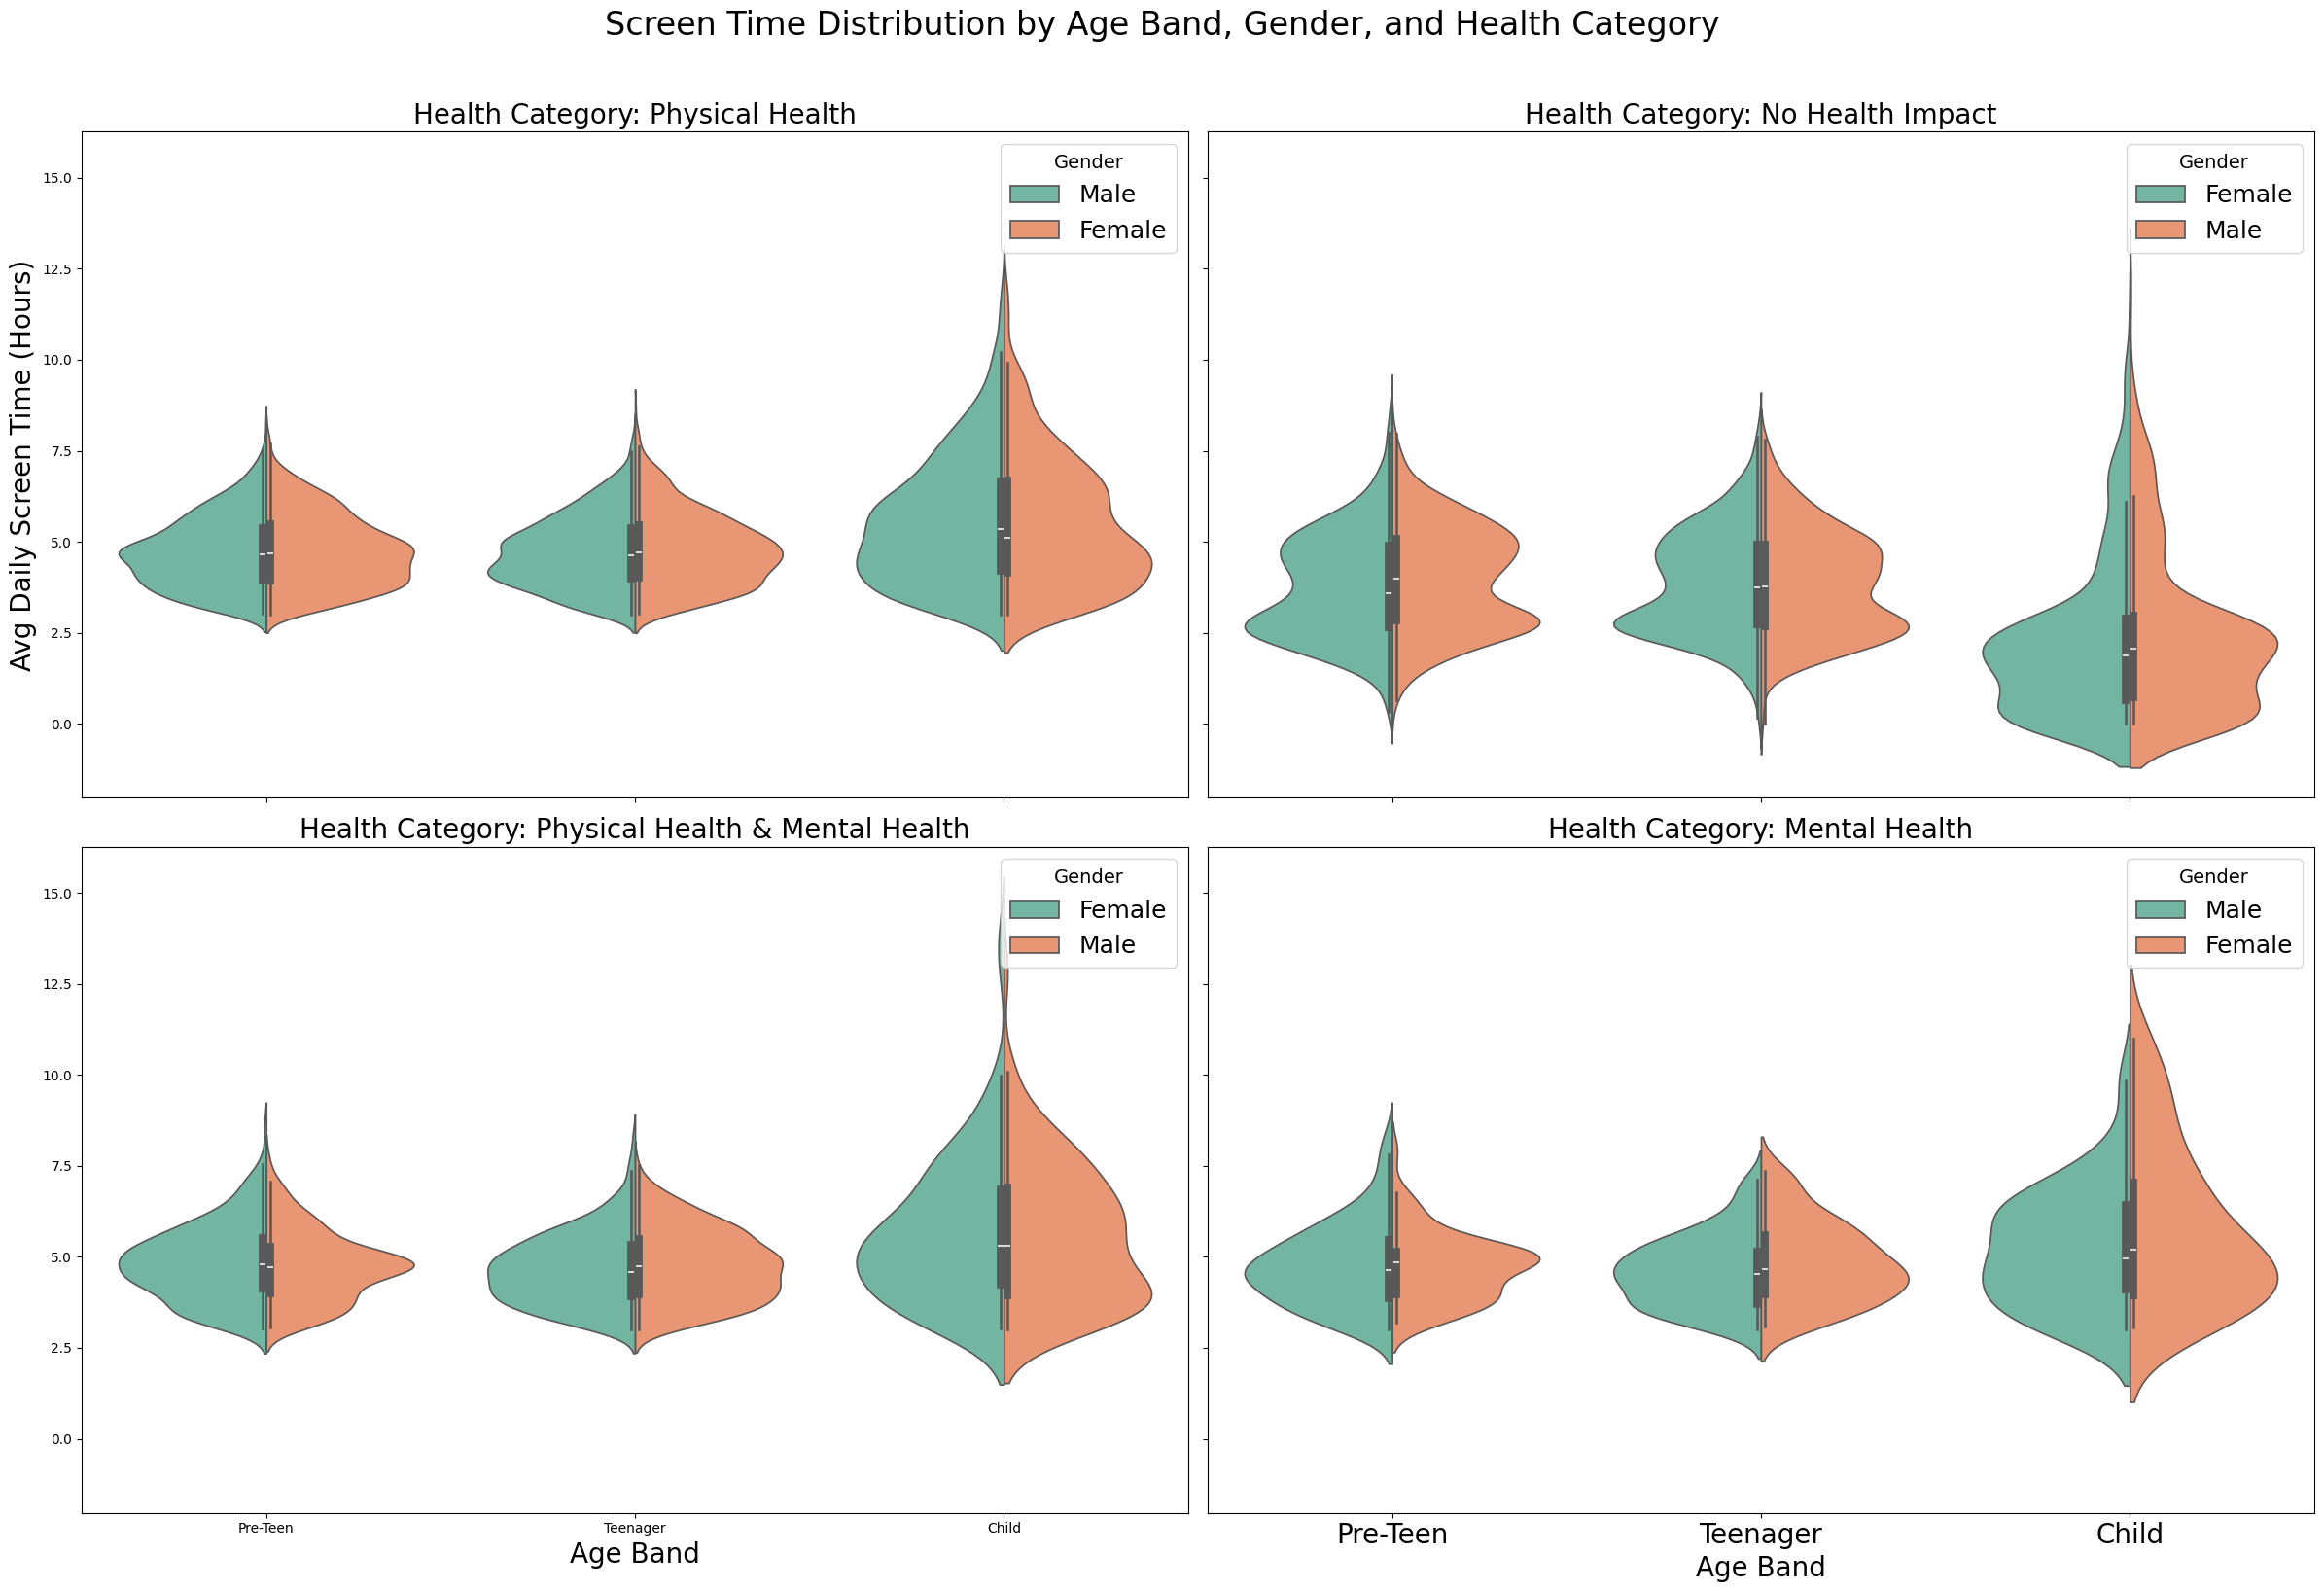

In [92]:
# violin plot for Health category,Age band and Gender
fig, axes = plt.subplots(2, 2, figsize=(24, 16), sharey=True, sharex=True)
health_categories = ["Physical Health", "No Health Impact", "Physical Health & Mental Health", "Mental Health"]
row_map = {0: ["Physical Health", "No Health Impact"], 1: ["Physical Health & Mental Health", "Mental Health"]}

for row_idx, categories in row_map.items():
    for col_idx, category in enumerate(categories):
        ax = axes[row_idx, col_idx]
        subset = df[df['Health_Category'] == category]
        sns.violinplot(data=subset, x='Age_Band', y='Avg_Daily_Screen_Time_hr', hue='Gender',
                      palette='Set2', split=True, ax=ax, density_norm='width')
        ax.set_title(f"Health Category: {category}", fontsize=20)
        ax.set_xlabel("Age Band", fontsize=20)
        plt.xticks(fontsize=20)
        ax.set_ylabel("Avg Daily Screen Time (Hours)", fontsize=20) if row_idx == 0 and col_idx == 0 else ax.set_ylabel("")
        ax.legend(title="Gender", title_fontsize=14, fontsize=18, loc='upper right')
        plt.yticks(fontsize=20)
plt.suptitle("Screen Time Distribution by Age Band, Gender, and Health Category", fontsize=24, y=1.02)
plt.tight_layout()
plt.show()

**Observation:**

1. In the “Mental Health” and “Physical Health & Mental Health” plots, Female violins for Teenagers and Pre-Teens likely show wider distributions and higher peaks, indicating a link between excessive use and mental health issues.

2. The “No Health Impact” plot likely shows narrower violins with lower medians for both genders across all age bands, especially Children, suggesting moderate screen time correlates with minimal health concerns.

3. Male violins in the “Physical Health” plot, particularly for Children, may extend to higher screen times and physical health impacts from TV use in rural Children, indicating device-specific risks.

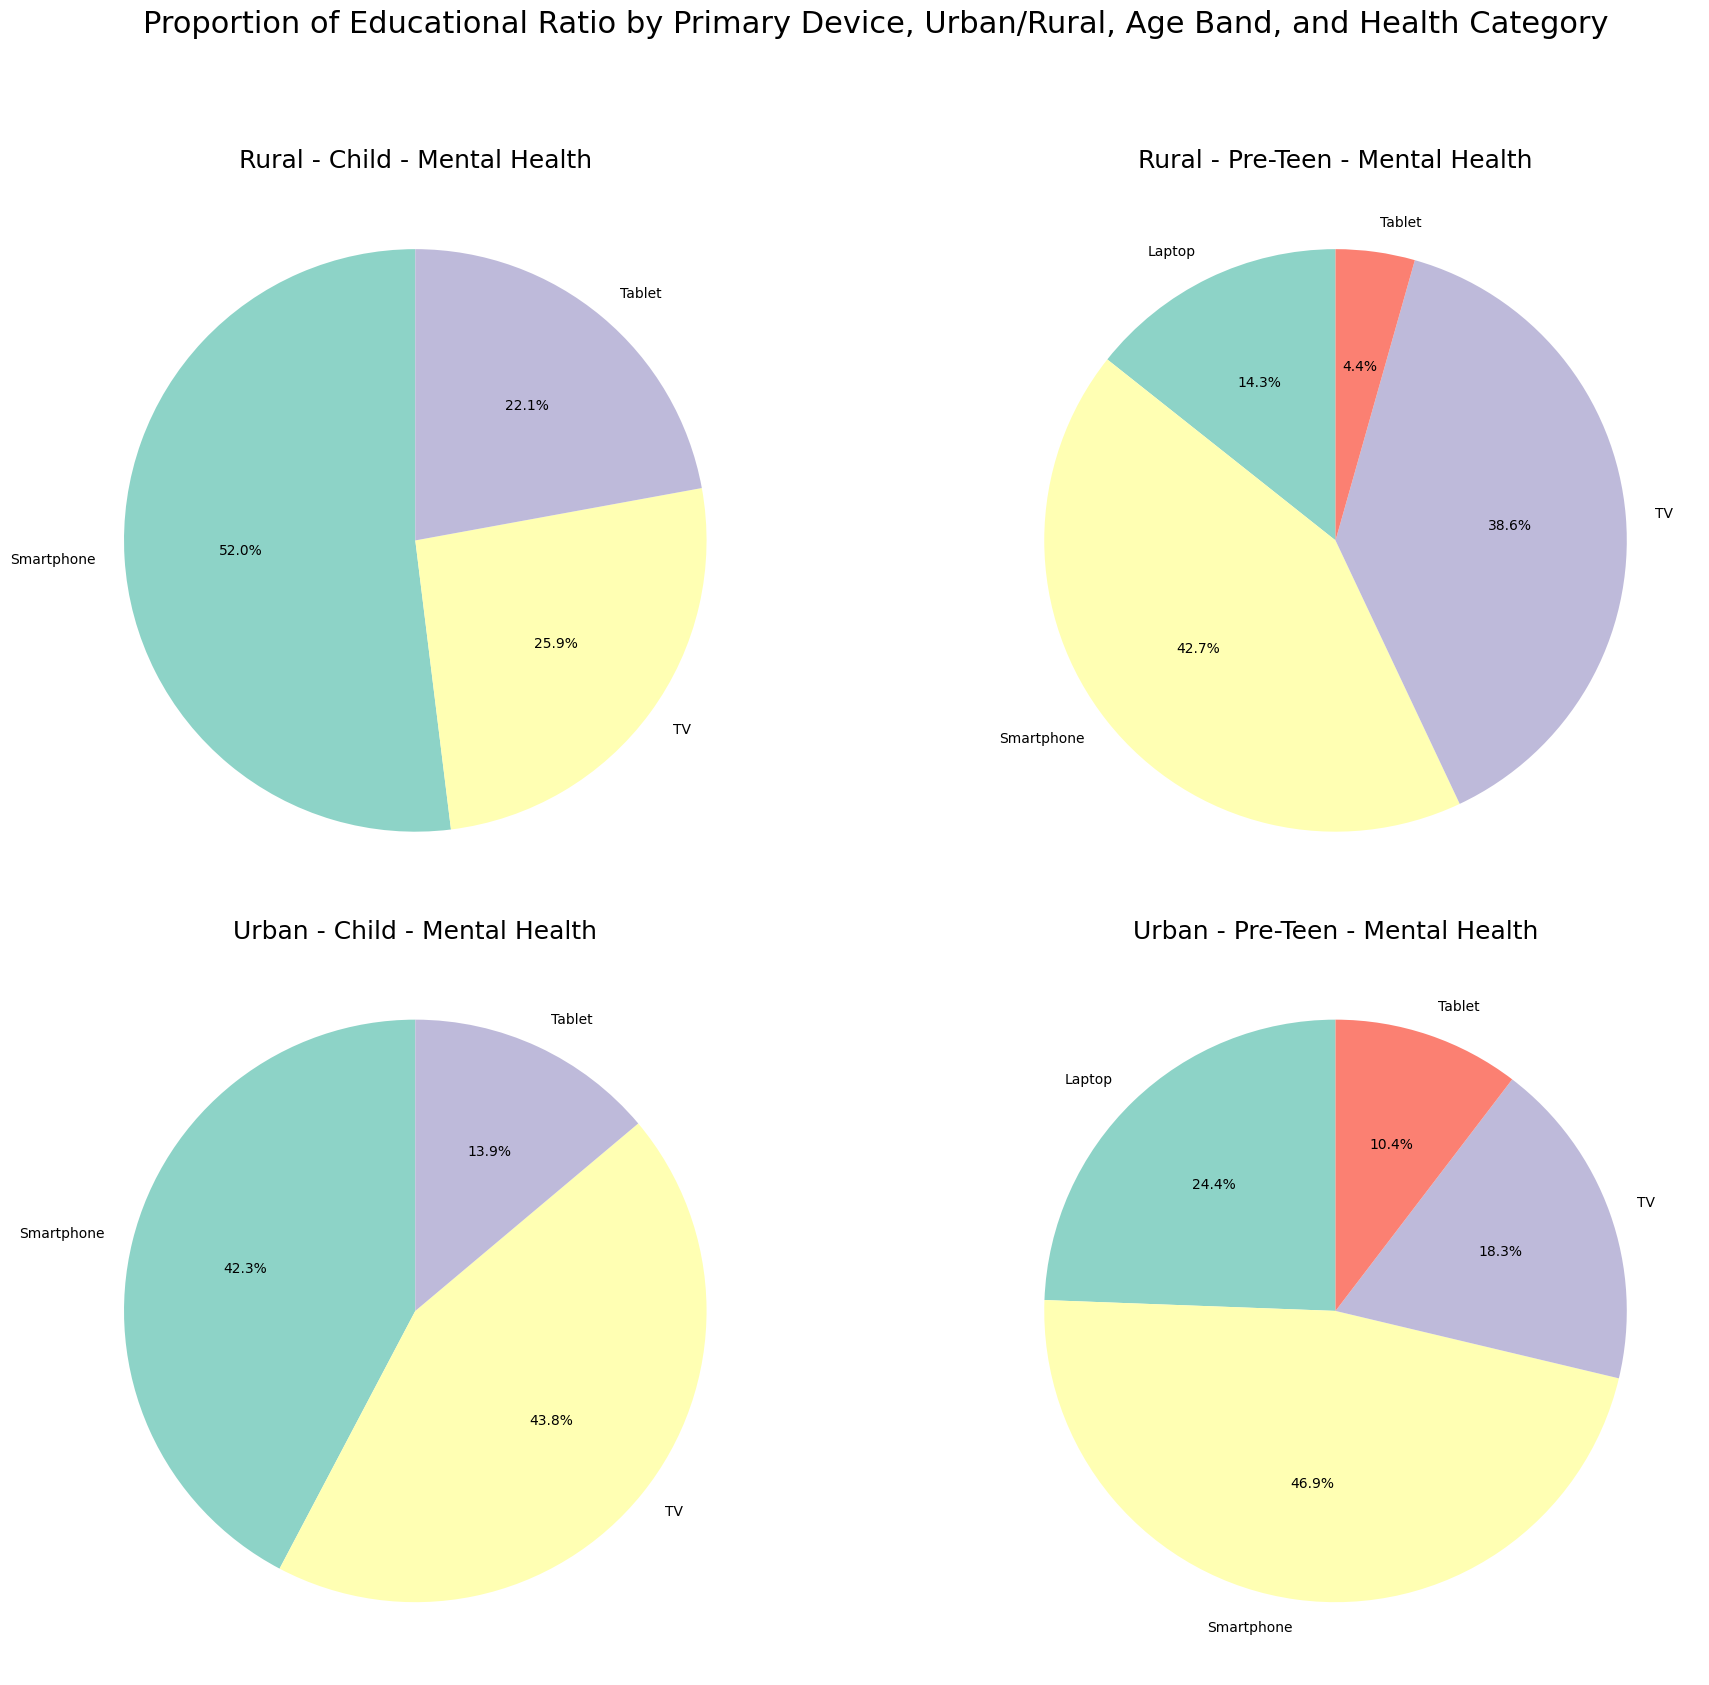

In [93]:
# Pie chart for Urban_or_Rural,Age_Band,Health_Category,Primary_Device and Educational_to_Recreational_Ratio
# Sum of Educational_to_Recreational_Ratio by Primary_Device, grouped by Urban_or_Rural, Age_Band, and Health_Category
grouped_data = df.groupby(['Urban_or_Rural', 'Age_Band', 'Health_Category', 'Primary_Device'])['Educational_to_Recreational_Ratio'].sum().reset_index()

urban_rural = grouped_data['Urban_or_Rural'].unique()
age_bands = grouped_data['Age_Band'].unique()
health_categories = grouped_data['Health_Category'].unique()
fig, axes = plt.subplots(2, 2, figsize=(20, 16), subplot_kw=dict(aspect="equal"))
axes = axes.flatten()

for idx, (ur, ab) in enumerate([(ur, ab) for ur in urban_rural[:2] for ab in age_bands[:2]]):
    ax = axes[idx]
    subset = grouped_data[(grouped_data['Urban_or_Rural'] == ur) & (grouped_data['Age_Band'] == ab)]
    for hc in health_categories:
        hc_subset = subset[subset['Health_Category'] == hc]
        if not hc_subset.empty:
            sizes = hc_subset['Educational_to_Recreational_Ratio']
            labels = hc_subset['Primary_Device']
            ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
            ax.set_title(f'{ur} - {ab} - {hc}', fontsize=18)
            break

for idx in range(len(urban_rural[:2]) * len(age_bands[:2]), 4):
    axes[idx].axis('off')
plt.suptitle('Proportion of Educational Ratio by Primary Device, Urban/Rural, Age Band, and Health Category', fontsize=22, y=1.05)
plt.tight_layout()
plt.show()

**Observation:**

1. Smartphones likely dominate each pie chart with the largest slices, reflecting their high user count and recreational focus, especially in Urban-Pre-Teen or Urban-Teenager combinations with potentially higher summed ratios.

2. Rural-Child pies may show larger TV slices compared to Urban counterparts, possibly linked to health issues like physical impacts.

3. Laptops and Tablets have smaller slices, with Tablets slightly larger in Urban-Teenager pies due to recreational use, while Laptops may be smallest across all charts, reflecting lower usage.

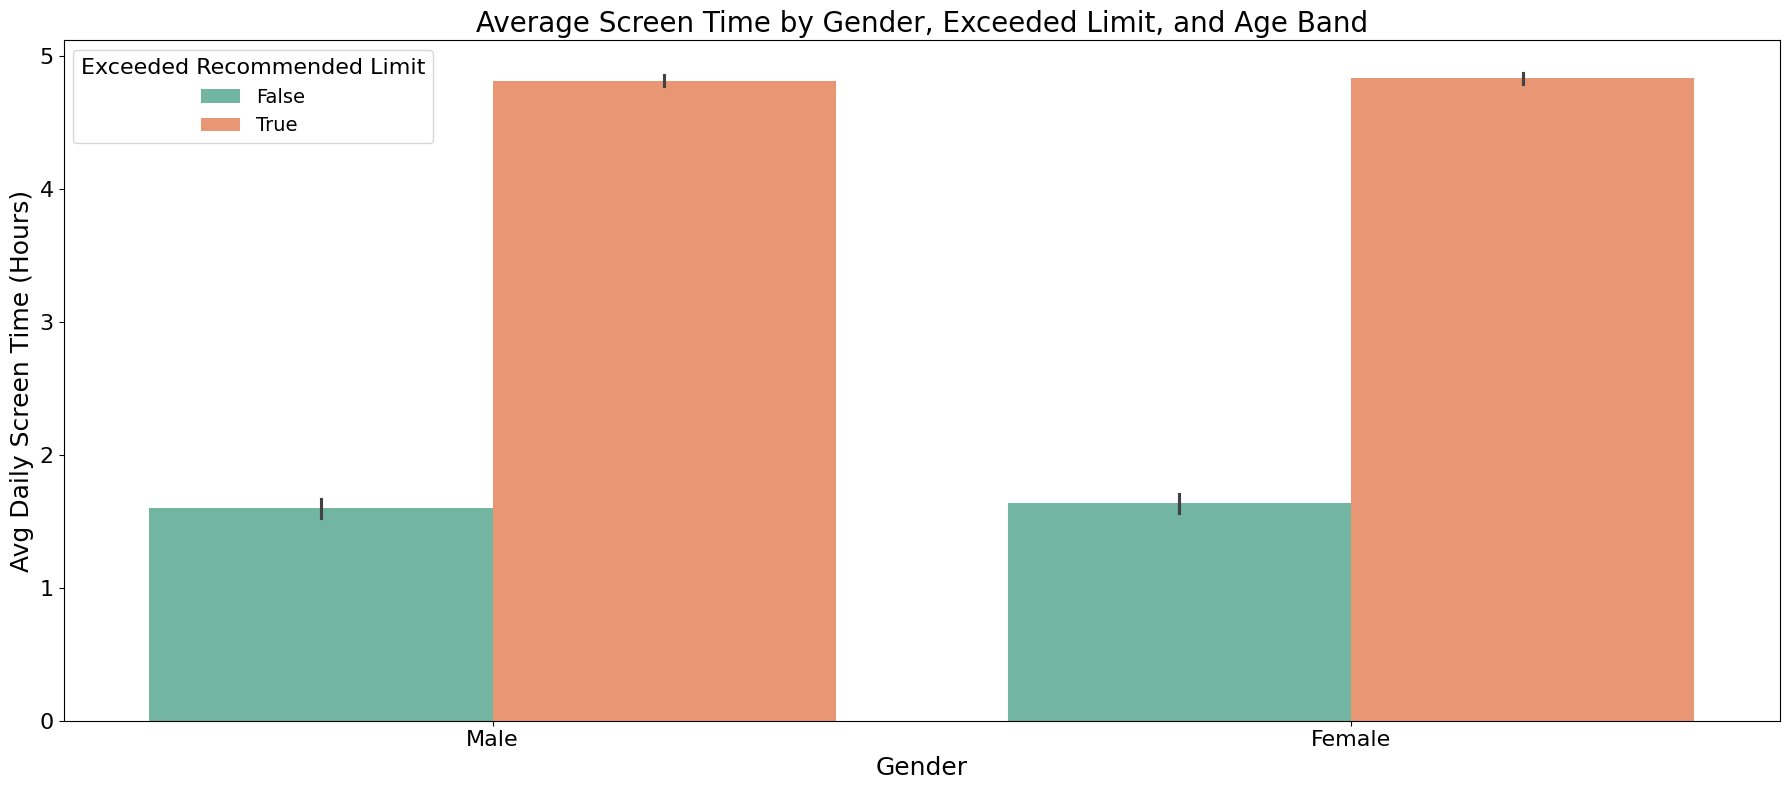

In [94]:
#Bar Chart: Avg_Daily_Screen_Time_hr by Gender, colored by Exceeded_Recommended_Limit, grouped by Age_Band
plt.figure(figsize=(18, 8))
sns.barplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', hue='Exceeded_Recommended_Limit', palette='Set2')
plt.title('Average Screen Time by Gender, Exceeded Limit, and Age Band', fontsize=20)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Avg Daily Screen Time (Hours)', fontsize=18)
plt.legend(title='Exceeded Recommended Limit', title_fontsize=16, fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

**Observation:**

1. Females in the “Yes” category for Exceeded_Recommended_Limit likely show higher bars, especially for Pre-Teens/Teenagers, indicating greater risk of excessive use compared to Males.

2. Males’ bars for “Yes” may be slightly lower but still significant, with Pre-Teens/Teenagers likely exceeding limits more than Children.

3. The “No” category for both genders likely has shorter bars, with Children showing the lowest averages, reflecting less frequent limit exceedance in younger groups.

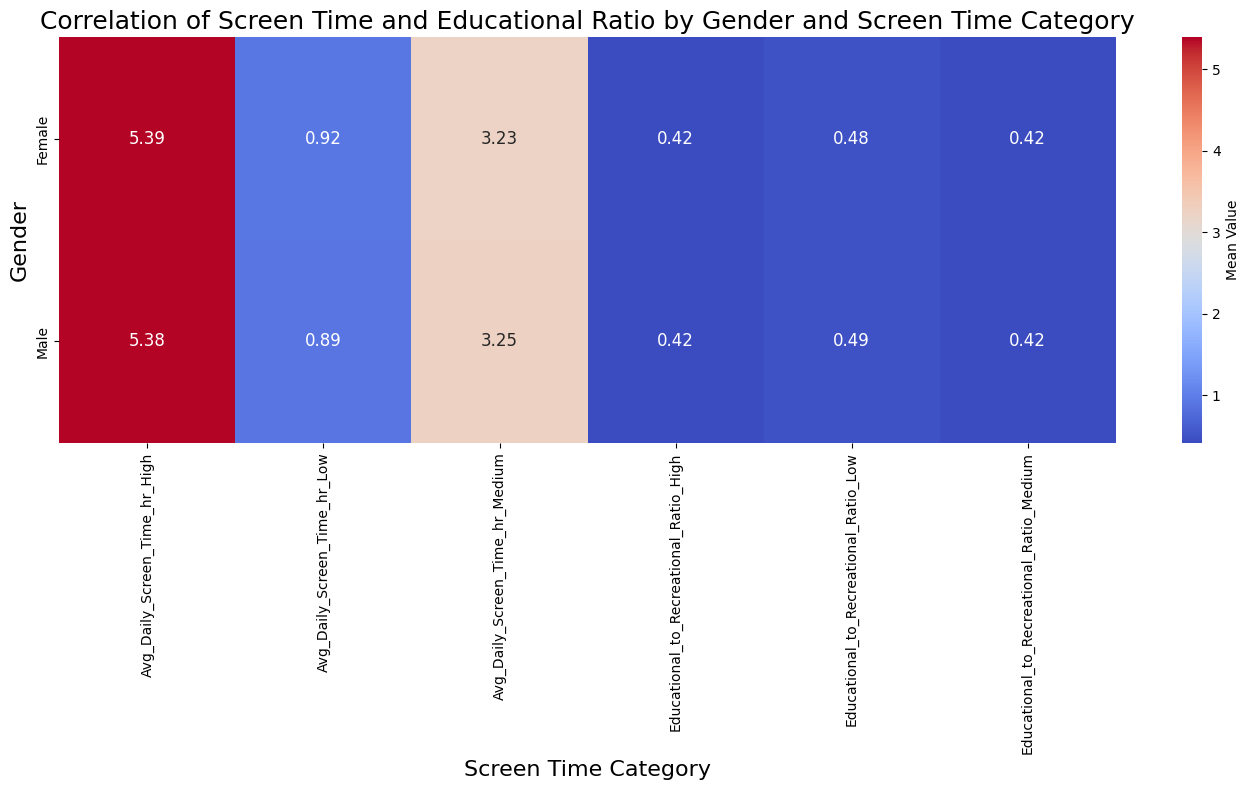

In [95]:
#  Heatmap : Correlation of Avg_Daily_Screen_Time_hr and Educational_to_Recreational_Ratio
# Create a pivot table with mean values
pivot_data = df.pivot_table(values=['Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio'],
                              index='Gender',
                              columns='Screen_Time_Category',
                              aggfunc='mean')
pivot_data.columns = ['_'.join(col).strip() for col in pivot_data.columns.values]

plt.figure(figsize=(14, 8))  # Larger figure for better visibility
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Mean Value'}, annot_kws={"size": 12})
plt.title('Correlation of Screen Time and Educational Ratio by Gender and Screen Time Category', fontsize=18)
plt.xlabel('Screen Time Category', fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.tight_layout()
plt.show()

 **Observation:**

 1. High screen time categories for both genders likely show the highest Avg_Daily_Screen_Time_hr values, especially for Females, indicating greater exposure in this group.

2. Females in the Low screen time category likely show warmer ratio values, indicating a higher educational focus, while Males’ ratios remain consistently lower across categories, highlighting gender-based usage differences.

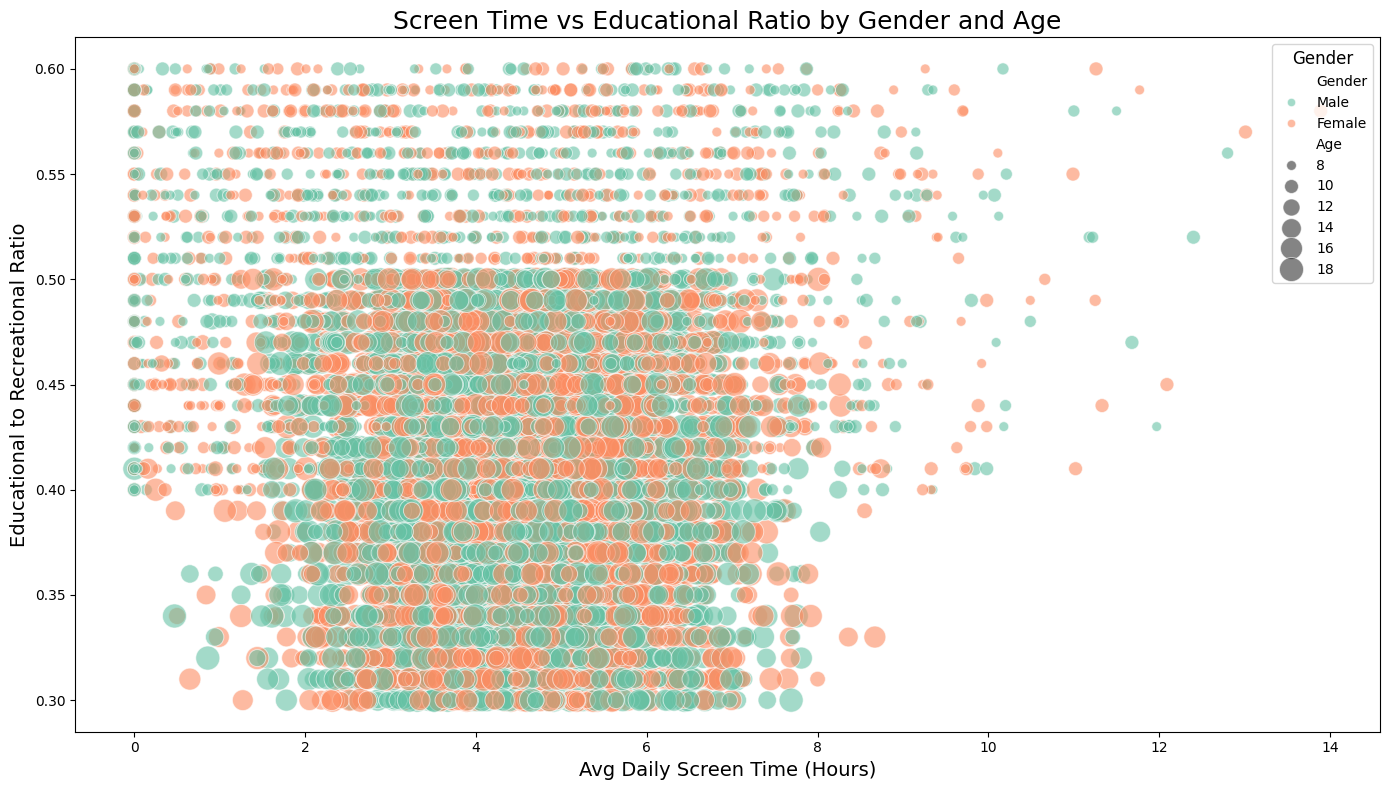

In [96]:
# Scatter Plot: Avg_Daily_Screen_Time_hr vs Educational_to_Recreational_Ratio, colored by Gender, sized by Age
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Avg_Daily_Screen_Time_hr', y='Educational_to_Recreational_Ratio', hue='Gender', size='Age',
                palette='Set2', sizes=(50, 300), alpha=0.6)
plt.title('Screen Time vs Educational Ratio by Gender and Age', fontsize=18)
plt.xlabel('Avg Daily Screen Time (Hours)', fontsize=14)
plt.ylabel('Educational to Recreational Ratio', fontsize=14)
plt.legend(title='Gender', title_fontsize=12, fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

**Observation:**

1. Higher screen times (above 6 hours) tend to correlate with lower educational ratios, especially among males.

2. Older individuals (larger points) show a wider spread in educational ratios, suggesting varied usage patterns with age.

3. Females exhibit a slightly higher clustering of moderate screen times (3-5 hours) with balanced educational ratios (around 0.4-0.5).

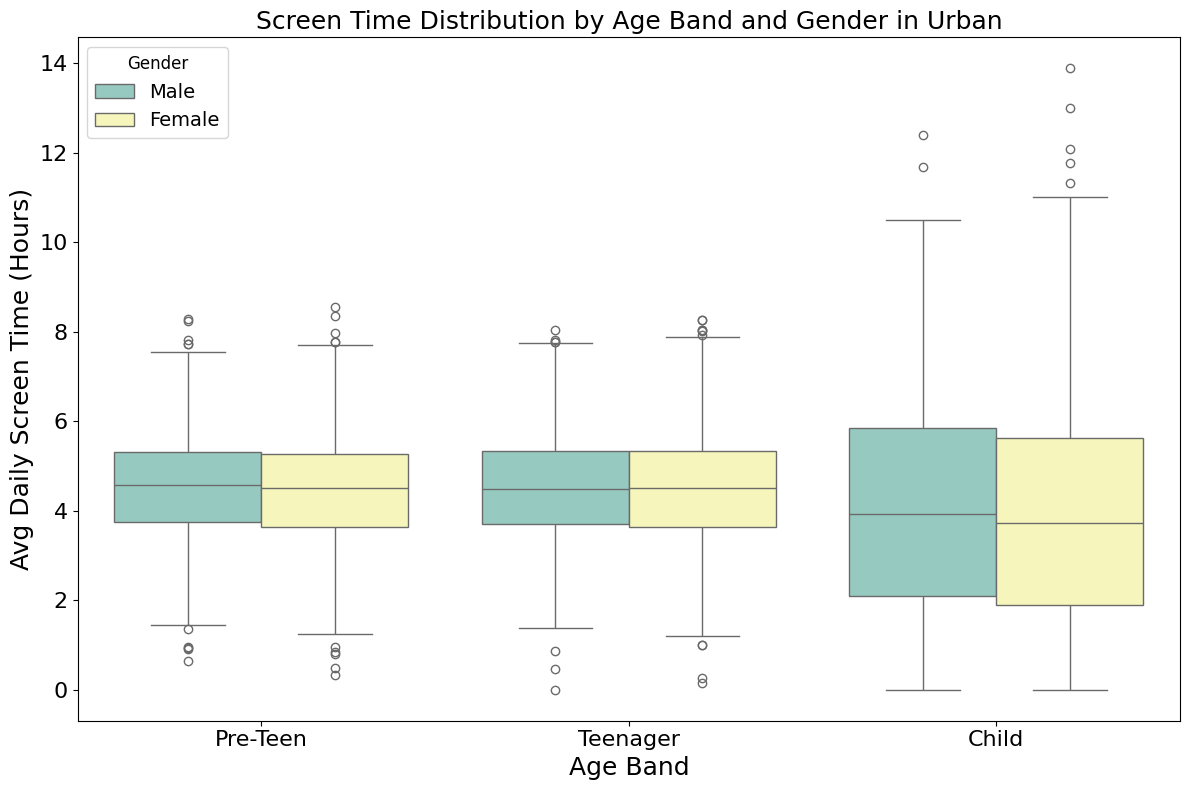

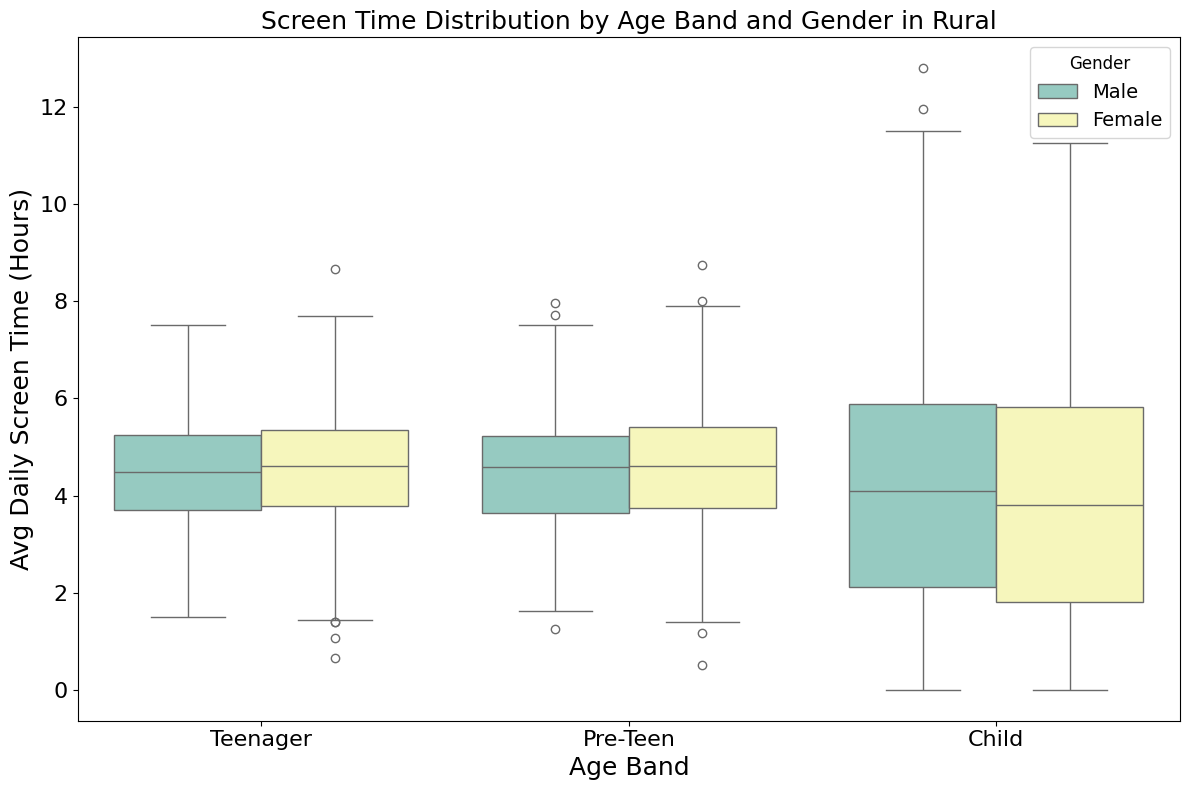

In [97]:
# Box Plots for Urban and Rural
urban_rural_values = df['Urban_or_Rural'].unique()
for ur in urban_rural_values:
    subset_data = df[df['Urban_or_Rural'] == ur]

    plt.figure(figsize=(12, 8))
    sns.boxplot(data=subset_data, x='Age_Band', y='Avg_Daily_Screen_Time_hr', hue='Gender', palette='Set3')
    plt.title(f'Screen Time Distribution by Age Band and Gender in {ur}', fontsize=18)
    plt.xlabel('Age Band', fontsize=18)
    plt.ylabel('Avg Daily Screen Time (Hours)', fontsize=18)
    plt.legend(title='Gender', title_fontsize=12, fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.show()

**Observation:**

1. In Urban areas, Teenagers show the highest median screen time (around 5 hours) with significant outliers, especially among males.

2. In Rural areas, Pre-Teens have a more consistent screen time distribution (3-5 hours) with fewer outliers compared to Urban areas.

3. Females in both Urban and Rural settings tend to have a slightly lower median screen time than males across all age bands.

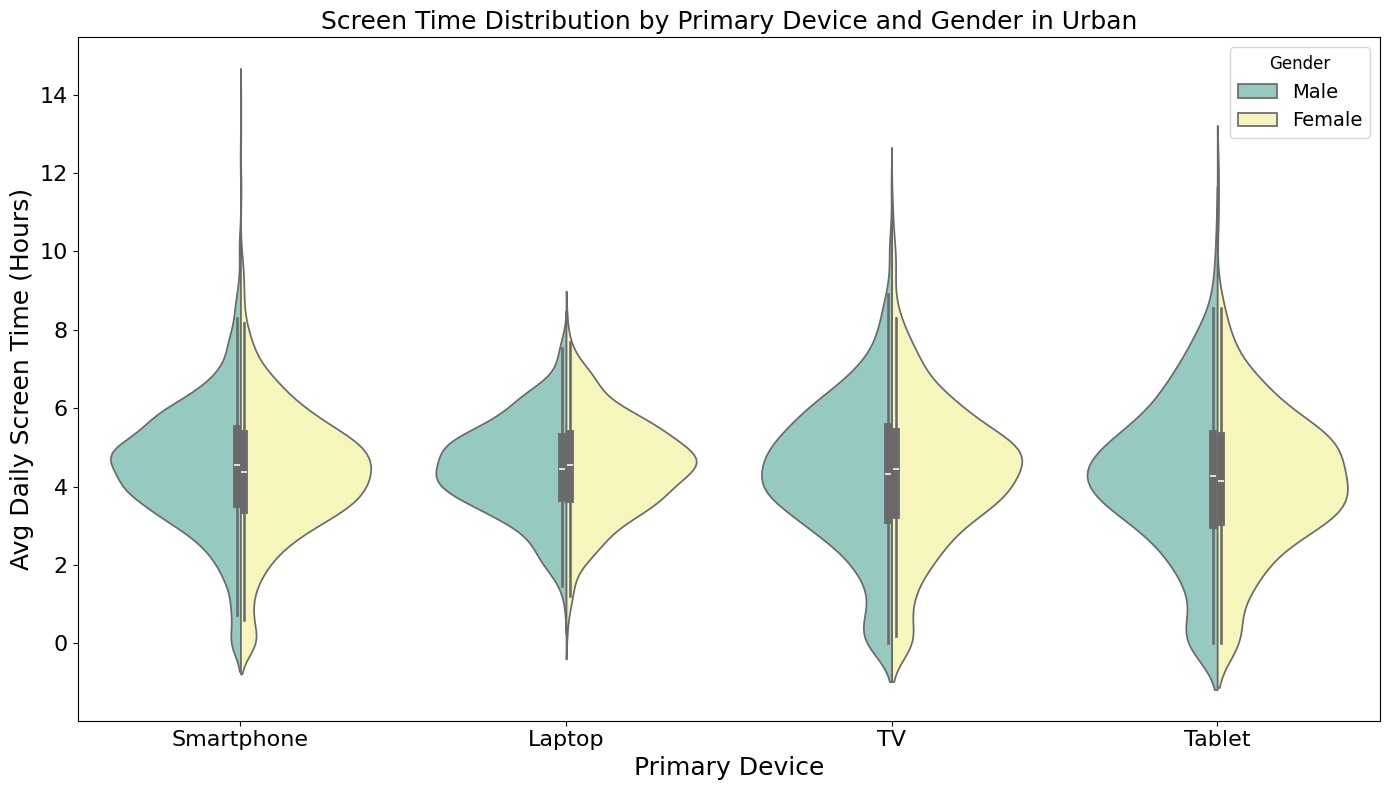

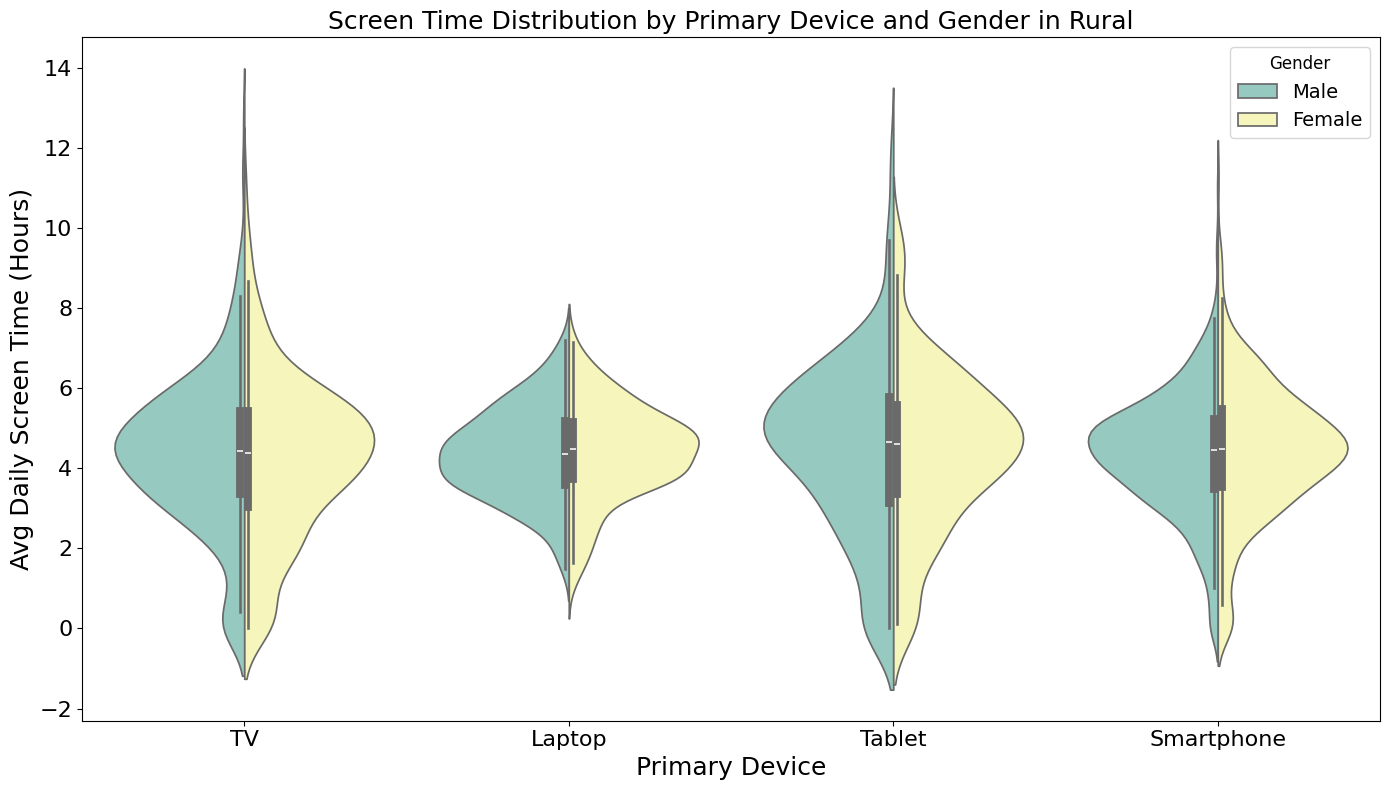

In [98]:
#Violin Plots for Urban and Rural
urban_rural_values = df['Urban_or_Rural'].unique()
for ur in urban_rural_values:
    subset_data = df[df['Urban_or_Rural'] == ur]

    plt.figure(figsize=(14, 8))
    sns.violinplot(data=subset_data, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', hue='Gender', palette='Set3', split=True, density_norm='width')
    plt.title(f'Screen Time Distribution by Primary Device and Gender in {ur}', fontsize=18)
    plt.xlabel('Primary Device', fontsize=18)
    plt.ylabel('Avg Daily Screen Time (Hours)', fontsize=18)
    plt.legend(title='Gender', title_fontsize=12, fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.show()

**Observation:**


1. In Urban areas, Smartphones show the widest distribution of screen time, with males peaking higher than females (up to 7-8 hours).

2. In Rural areas, TVs have a more uniform distribution, with a median around 4-5 hours for both genders.

3. Females using Laptops in Urban areas tend to have a narrower screen time range (3-6 hours) compared to males.